In [30]:
from qiskit import Aer,QuantumRegister,ClassicalRegister,QuantumCircuit,execute

In [31]:
import math
import numpy as np
from qiskit.tools.visualization import plot_histogram


In [13]:
Inp = [3,8]
qubits = math.floor(math.log2(max(Inp))+1)

In [53]:
cr = QuantumRegister(qubits,'cr')
pr = QuantumRegister(len(Inp),'pr')
meas = ClassicalRegister(2,'meas')

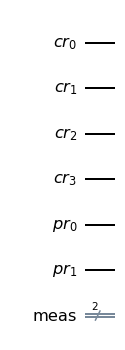

In [54]:
qc = QuantumCircuit(cr,pr,meas)
qc.draw(output='mpl')

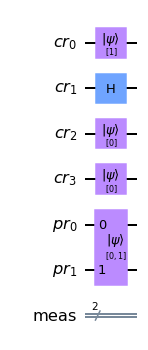

In [55]:
qc.initialize('1',0)
qc.h(1)
qc.initialize('0',2)
qc.initialize('0',3)
qc.initialize('01',pr)
qc.draw(output='mpl')

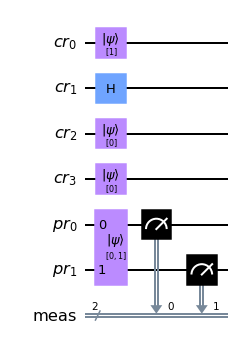

In [56]:
# qc.measure(cr,meas)
qc.measure(pr,meas)
qc.draw(output='mpl')

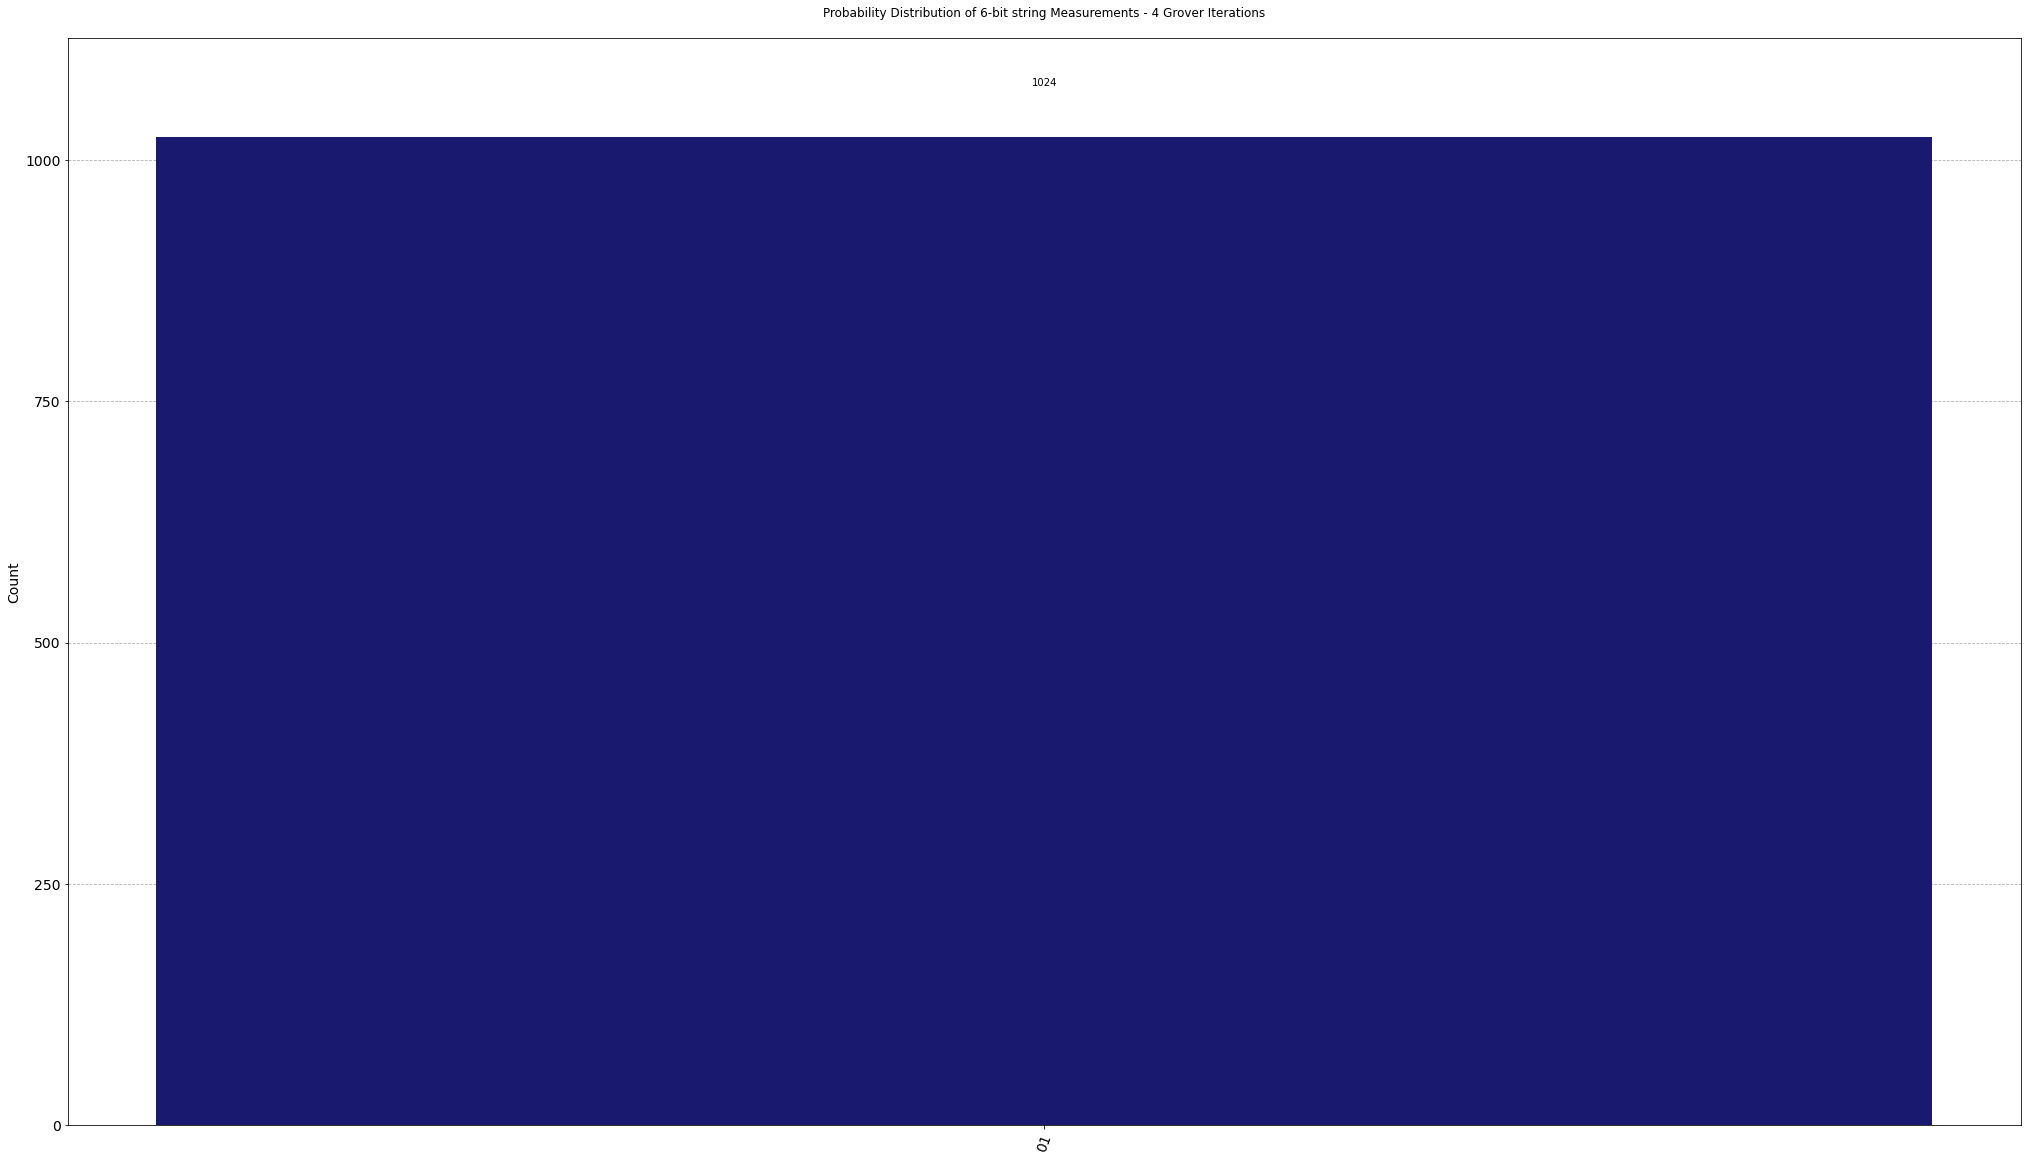

In [57]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator)

# Run and get counts
result = simulator.run(qc).result()
counts = job.result().get_counts(qc)
plot_histogram(counts, title='Probability Distribution of 6-bit string Measurements - 4 Grover Iterations\n', color='midnightblue', figsize=(35,20))